In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [2]:
!cd src/drag/extra && ls

ak47	  lap338orig  m107m1a1	mortar81  rhein
b32_12.7  lapua338    m795	old	  study2


In [4]:
# projectile parameters
mass = 0.0079
diameter = 0.00762
length =  0.02
velocity =  715
# 0-linear, 1-graph, 2-point 3-alpha
cdtype = 3

In [5]:
 lst = ['mass ' + str(mass), 'diameter ' + str(diameter),
       'length ' + str(length), 'velocity ' + str(velocity),
       'cdtype '+ str(cdtype)]  

df = pd.DataFrame(lst)  
df

,0
0,mass 0.0079
1,diameter 0.00762
2,length 0.02
3,velocity 715
4,cdtype 3


In [6]:
df.to_csv('src/drag/in/proj.dat', index=False, header=False)

In [7]:
# shot parameters

In [8]:
angle_deg = 45 # shot angle
angle_dlt = 1 # angle change per shot
height = 0 # height of gun from surface
ntraj = 1 # number of shots 
turbulence = 0 # turbulence velocity, m/s
zwind = 0 # side wind, m/s
xwind = 0 # head wind, m/s

In [9]:
lst = ['angle_deg ' + str(angle_deg), 
       'angle_dlt ' + str(angle_dlt),
       'height ' + str(height), 
       'ntraj ' + str(ntraj),
       'turbulence '+ str(turbulence),
       'zwind ' + str(zwind),
       'xwind '+ str(xwind)
      ]  
 
df = pd.DataFrame(lst)  
df

,0
0,angle_deg 45
1,angle_dlt 1
2,height 0
3,ntraj 1
4,turbulence 0
5,zwind 0
6,xwind 0


In [10]:
df.to_csv('src/drag/in/shot.dat', index=False, header=False)

In [11]:
df

,0
0,angle_deg 45
1,angle_dlt 1
2,height 0
3,ntraj 1
4,turbulence 0
5,zwind 0
6,xwind 0


In [12]:
# Fahrenheit to Kelvin
tempF = 32
std_temp = (tempF - 32) * 5/9 + 273.15
std_temp

273.15

In [13]:
# constants (do not change these values unless its std_temp)

In [14]:
# default SI
Earth_radius = 6378137
Earth_mass = 5.9722e24

# Gravitational constant
Ggrav = 6.67408e-11

# Constants used only for atmospheric calculation
# sea level standard pressure, Pa
std_press = 101325
# temperature lapse rate, K/km
temp_rate = 6.5
# the radius of the earth, km
Earth_atm_R = 6356.766
# sea level standard temperature, K
std_temp = 288.15
# gravitational constant, m/sec2
grav_atm = 9.80665
# molecular weight of dry air, gm/mol
molec_w = 28.9644
# gas constant, J/(mol*K)
gas_const = 8.31432
# speed of sound at 1K
speed_1k = 20.046

In [15]:
 lst = ['Earth_radius ' + str(Earth_radius), 
       'Earth_mass ' + str(Earth_mass),
       'Ggrav ' + str(Ggrav), 
       'std_press ' + str(std_press),
       'temp_rate '+ str(temp_rate),
       'Earth_atm_R ' + str(Earth_atm_R),
       'std_temp '+ str(std_temp),
       'grav_atm ' + str(grav_atm), 
       'molec_w ' + str(molec_w),
       'gas_const '+ str(gas_const),
       'speed_1k ' + str(speed_1k)
      ]  

df = pd.DataFrame(lst)  
df

,0
0,Earth_radius 6378137
1,Earth_mass 5.9722e+24
2,Ggrav 6.67408e-11
3,std_press 101325
4,temp_rate 6.5
5,Earth_atm_R 6356.766
6,std_temp 288.15
7,grav_atm 9.80665
8,molec_w 28.9644
9,gas_const 8.31432


In [16]:
df.to_csv('src/drag/in/consts.dat', index=False, header=False)

In [17]:
# Run simulation
!cd src/drag/ && ./drag.u.exe

Grav g = 9.79801
1/1 saving ok
Cd use [0.244403:2.10121]
Range 3020.212315382709221 at 45


In [18]:
# View Data

In [19]:
# open shot data
with open('src/drag/out/shots_summary.dat', 'r') as infile, \
     open('src/drag/data/shots_raw.dat', 'w') as outfile:
    data = infile.read()
    data = data.replace("#", "")
    outfile.write(data)

In [20]:
with open('src/drag/data/shots_raw.dat', 'r') as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines:
        newLine = line.strip(' ').split()
        newLines.append(newLine)

with open('src/drag/data/shots.csv', 'w') as output_file:
    file_writer = csv.writer(output_file)
    file_writer.writerows(newLines)

In [21]:
df=pd.read_csv('src/drag/data/shots.csv')

In [22]:
df

,ElevMils,Range,Z,Y,TOF,MaxH,Vfin,AOFdeg,EK0,EKfin,RejectRate%
0,800,3020.21,0,-0.715074,31.8868,1319.85,120.123,73.432,2019.34,56.9965,0


In [23]:
# https://github.com/mazonka/artill/blob/master/user_guide.pdf

In [24]:
'''
ElevMils = elevation angle in mils
Range = earth's surface distance to the hit point
Z = Z coordinate of the final point (sidewise)
Y = Y coordinate  of the final point. Normally negative due to Earth's curvature
TOF = time of flight
MaxH = Max height of the trajectory from Earth's surface
Vfin = final velocity
AOFdeg = angle of fall in degrees
EK0 = initial kinetic energy (J)
EKfin = ifnal kinetic energy (J)
RejectRate = percentage of rejected steps of integration
''' 

"\nElevMils = elevation angle in mils\nRange = earth's surface distance to the hit point\nZ = Z coordinate of the final point (sidewise)\nY = Y coordinate  of the final point. Normally negative due to Earth's curvature\nTOF = time of flight\nMaxH = Max height of the trajectory from Earth's surface\nVfin = final velocity\nAOFdeg = angle of fall in degrees\nEK0 = initial kinetic energy (J)\nEKfin = ifnal kinetic energy (J)\nRejectRate = percentage of rejected steps of integration\n"

In [25]:
# open trajectory data

with open('src/drag/out/trajs.dat', 'r') as infile, \
     open('src/drag/data/trajs_raw.dat', 'w') as outfile:
    data = infile.read()
    data = data.replace("#", "")
    outfile.write(data)

In [26]:
with open('src/drag/data/trajs_raw.dat', 'r') as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines:
        newLine = line.strip(' ').split()
        newLines.append(newLine)

with open('src/drag/data/trajs.csv', 'w') as output_file:
    file_writer = csv.writer(output_file)
    file_writer.writerows(newLines)

In [27]:
df=pd.read_csv('src/drag/data/trajs.csv')

In [28]:
df

,Time,X,Y,Z,vX,vY,vZ,dt,Length,Range,HeatKJ,Mach
0,0.0000,0.00000,0.000000,0,505.5810,505.581,0,0.000000,0.00000,0.00000,0.000000,2.101210
1,0.0100,5.05581,5.055320,0,500.7350,500.638,0,0.010000,7.14965,5.05581,0.038523,2.080980
2,0.0200,10.06320,10.061200,0,495.9660,495.773,0,0.010000,14.23010,10.06310,0.076058,2.061080
3,0.0300,15.02280,15.018400,0,491.2730,490.985,0,0.010000,21.24240,15.02280,0.112636,2.041490
4,0.0400,19.93550,19.927800,0,486.6540,486.272,0,0.010000,28.18760,19.93550,0.148290,2.022210
...,...,...,...,...,...,...,...,...,...,...,...,...
3185,31.8500,3018.95000,3.523020,0,34.3360,-115.052,0,0.010000,4209.55000,3018.95000,1.962070,0.352862
3186,31.8600,3019.29000,2.372010,0,34.3135,-115.075,0,0.010000,4210.75000,3019.29000,1.962140,0.352902
3187,31.8700,3019.64000,1.220770,0,34.2911,-115.097,0,0.010000,4211.95000,3019.64000,1.962220,0.352943
3188,31.8800,3019.98000,0.069309,0,34.2686,-115.120,0,0.010000,4213.15000,3019.98000,1.962290,0.352984


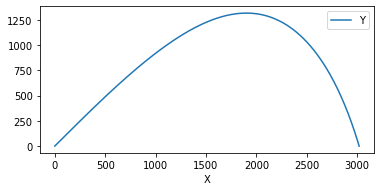

In [29]:
df.plot(x='X', y='Y')
plt.gca().set_aspect('equal')

<AxesSubplot:xlabel='X'>

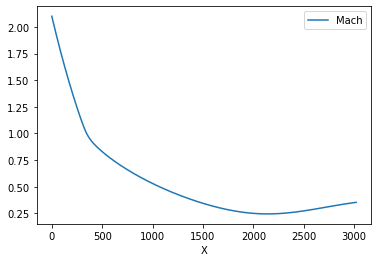

In [30]:
df.plot(x='X', y='Mach')

<AxesSubplot:xlabel='X'>

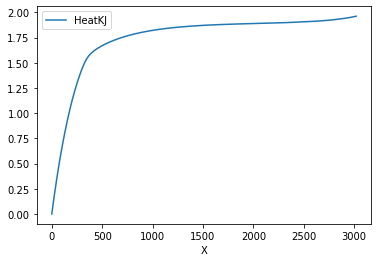

In [31]:
df.plot(x='X', y='HeatKJ')

<AxesSubplot:xlabel='Time'>

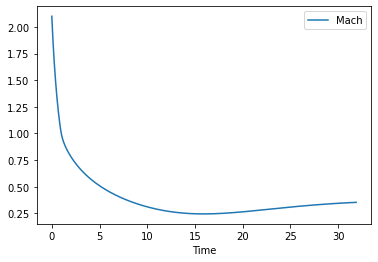

In [32]:
df.plot(x='Time', y='Mach')

In [33]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<ipython-input-34-341be35d4ba5>:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  threedee = plt.figure().gca(projection='3d')


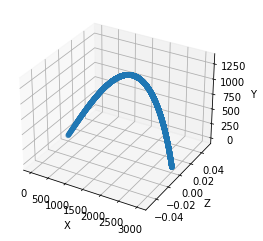

In [34]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['X'], df['Z'], df['Y'])
threedee.set_xlabel('X')
threedee.set_ylabel('Z')
threedee.set_zlabel('Y')
plt.show()